In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
# EDA

In [5]:
df.shape

(4888, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [8]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [9]:
df.replace('Fe Male', 'Female', inplace= True)

In [10]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.isnull().sum().sort_values(ascending= False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [12]:
round(100* (df.isnull().sum() / len(df.index)).sort_values(ascending= False), 2)

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Designation                 0.00
OwnCar                      0.00
PitchSatisfactionScore      0.00
Passport                    0.00
CustomerID                  0.00
MaritalStatus               0.00
ProdTaken                   0.00
NumberOfPersonVisiting      0.00
Gender                      0.00
Occupation                  0.00
CityTier                    0.00
ProductPitched              0.00
dtype: float64

In [13]:
df.dropna(axis= 0, inplace = True)

In [14]:
round(100* (df.isnull().sum() / len(df.index)).sort_values(ascending= False), 2)

CustomerID                  0.0
ProdTaken                   0.0
Designation                 0.0
NumberOfChildrenVisiting    0.0
OwnCar                      0.0
PitchSatisfactionScore      0.0
Passport                    0.0
NumberOfTrips               0.0
MaritalStatus               0.0
PreferredPropertyStar       0.0
ProductPitched              0.0
NumberOfFollowups           0.0
NumberOfPersonVisiting      0.0
Gender                      0.0
Occupation                  0.0
DurationOfPitch             0.0
CityTier                    0.0
TypeofContact               0.0
Age                         0.0
MonthlyIncome               0.0
dtype: float64

In [15]:
df.shape

(4128, 20)

In [16]:
df.drop(columns=['CustomerID'], inplace=True)

In [17]:
cats = [col for col in df.columns if df[col].dtype == 'object']

nums = [col for col in df.columns if df[col].dtype != 'object']

In [18]:
cats.append('ProdTaken')
cats.append('CityTier')
cats.append('PreferredPropertyStar')
cats.append('Passport')
cats.append('PitchSatisfactionScore')
cats.append('OwnCar')


nums.remove('ProdTaken')
nums.remove('CityTier')
nums.remove('PreferredPropertyStar')
nums.remove('Passport')
nums.remove('PitchSatisfactionScore')
nums.remove('OwnCar')

In [19]:
nums

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [20]:
cats

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation',
 'ProdTaken',
 'CityTier',
 'PreferredPropertyStar',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar']

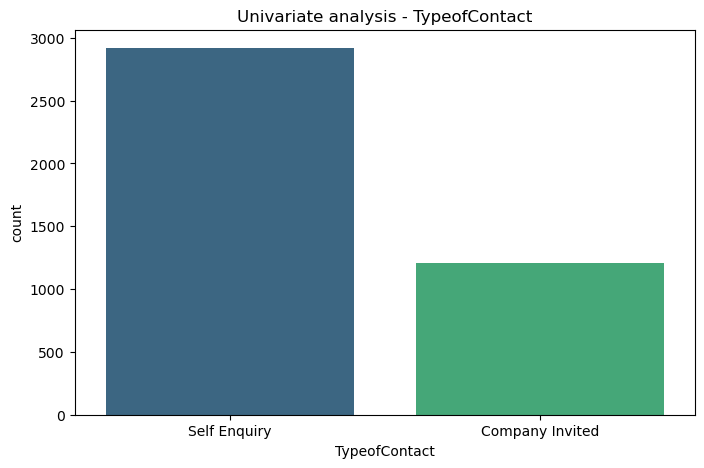

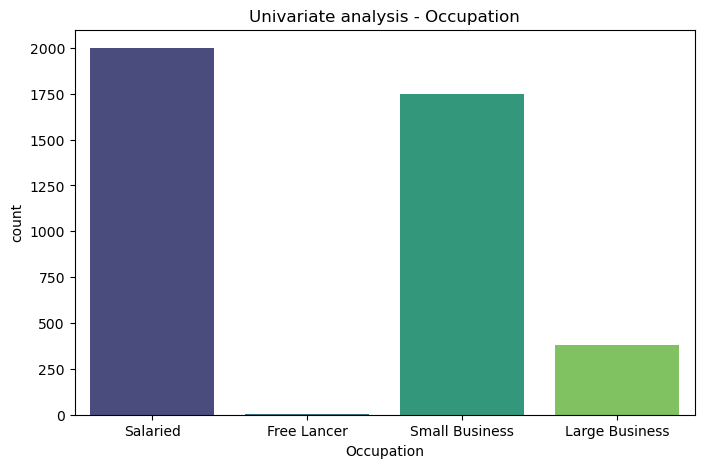

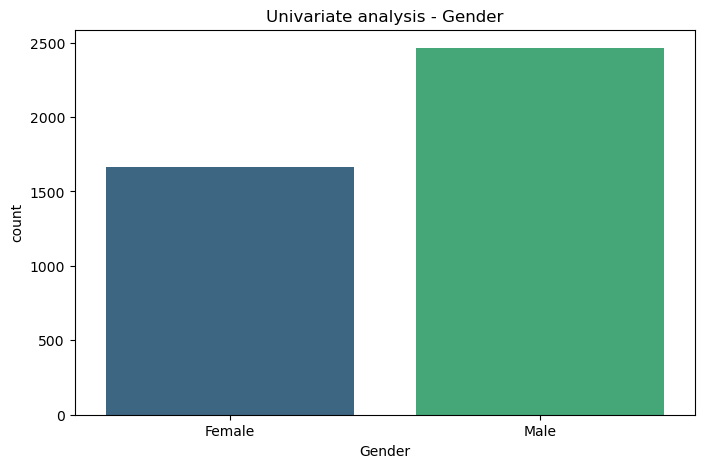

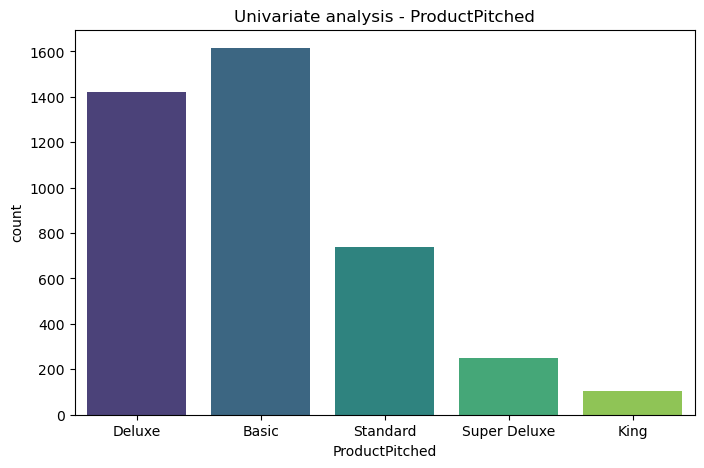

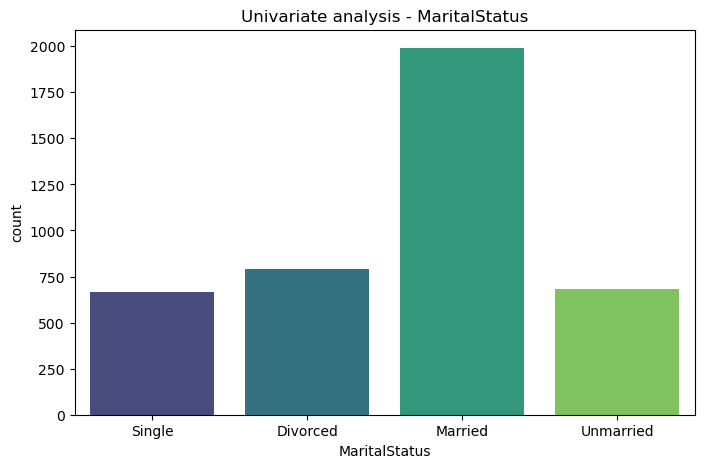

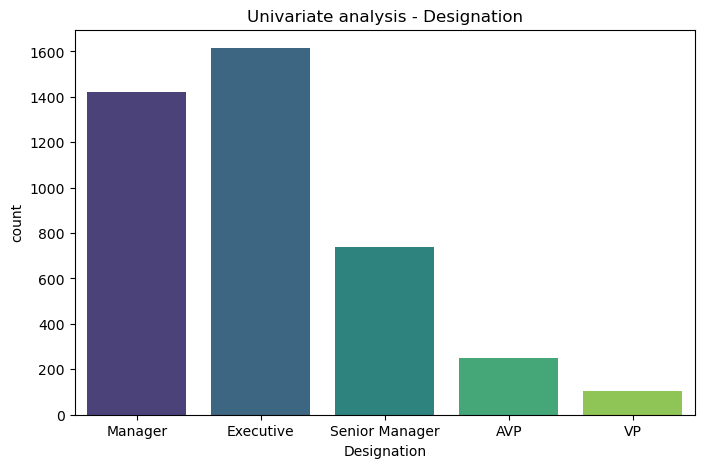

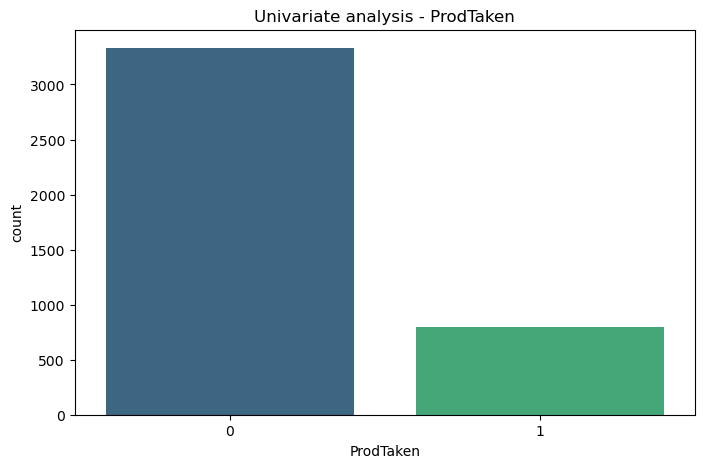

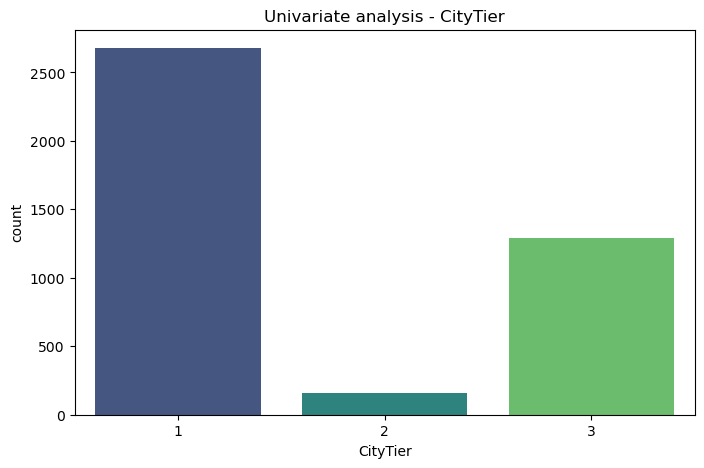

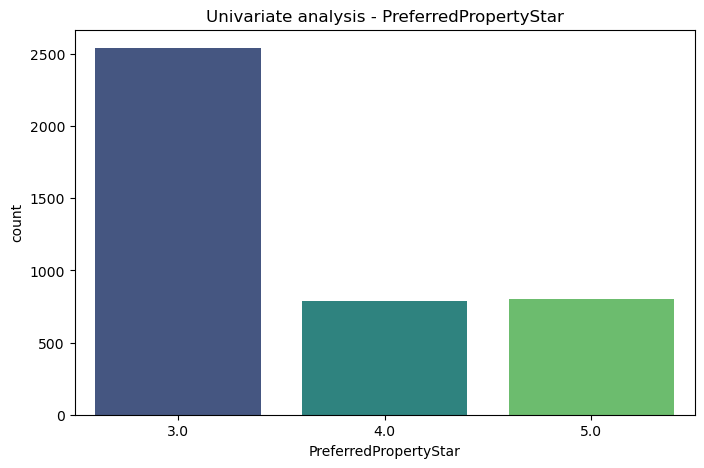

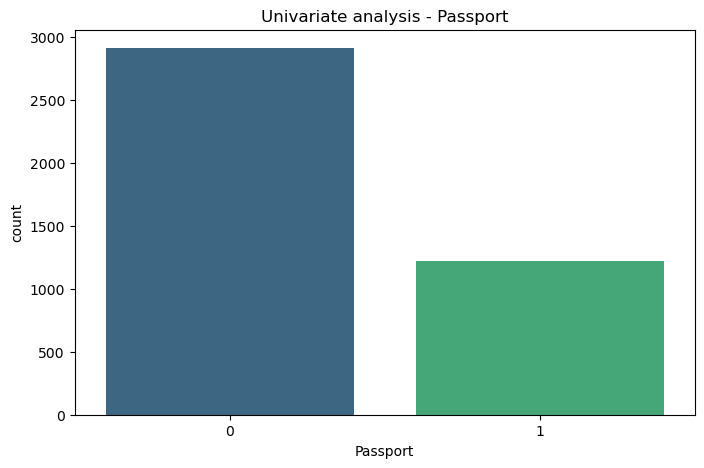

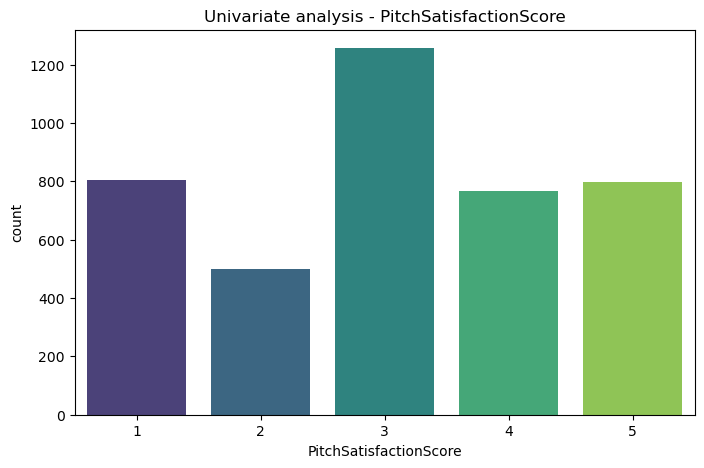

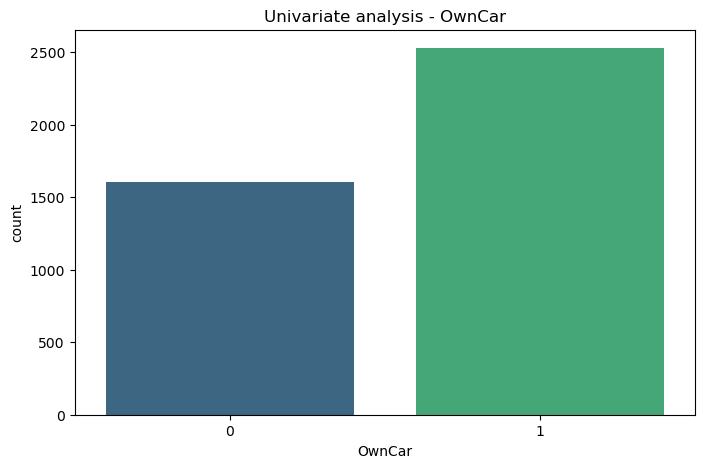

In [21]:
# Univariate analysis for categroical columns

for cat_column in cats:
    plt.figure (figsize = (8,5))
    sns.countplot(x = cat_column, data =df, palette= 'viridis')
    plt.title(f"Univariate analysis - {cat_column}")
    plt.show()

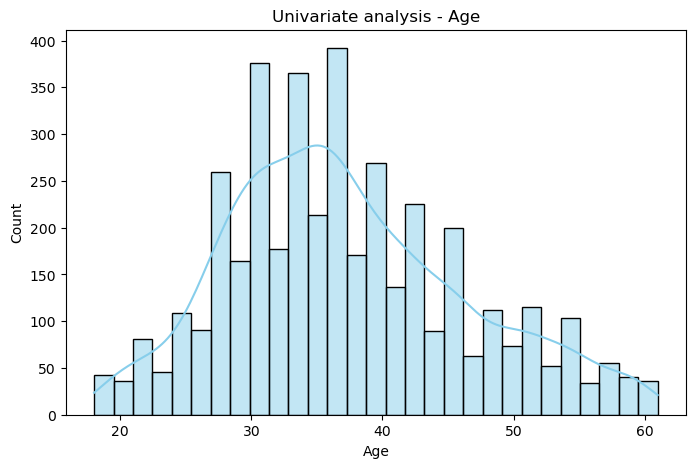

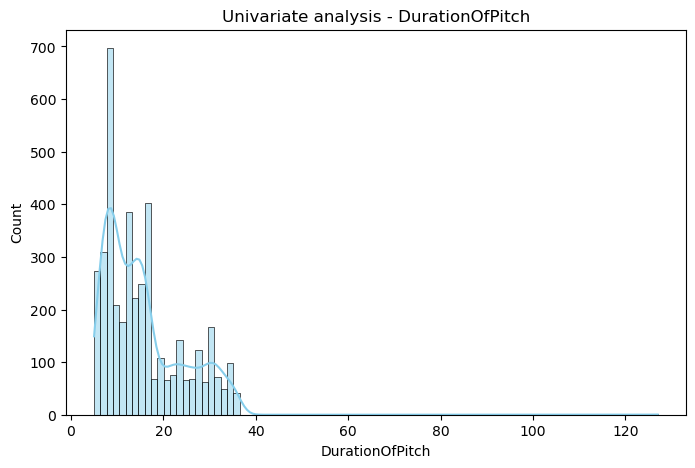

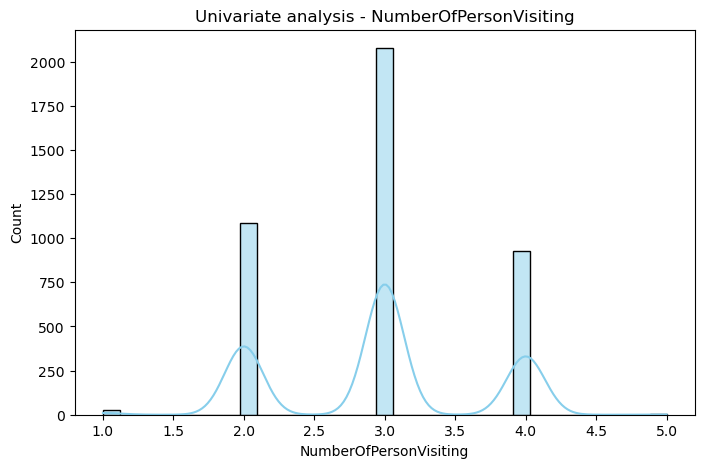

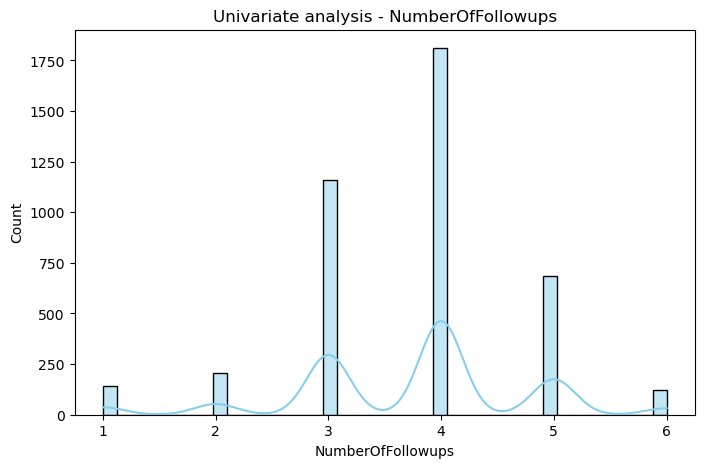

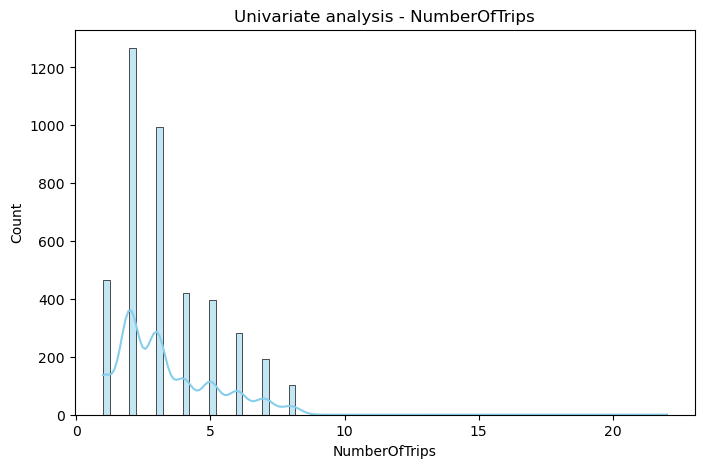

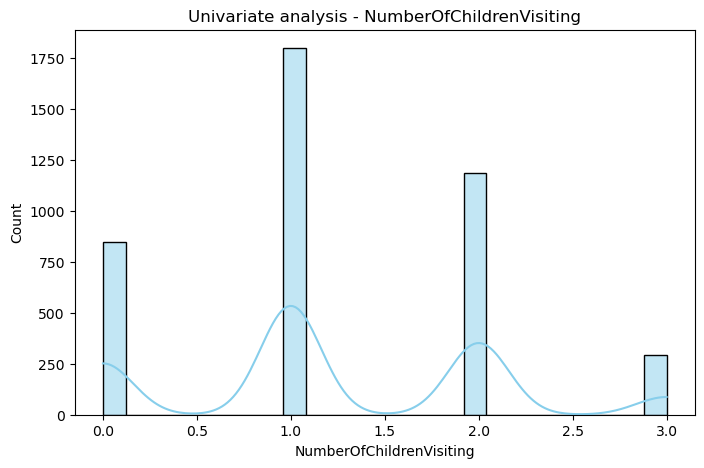

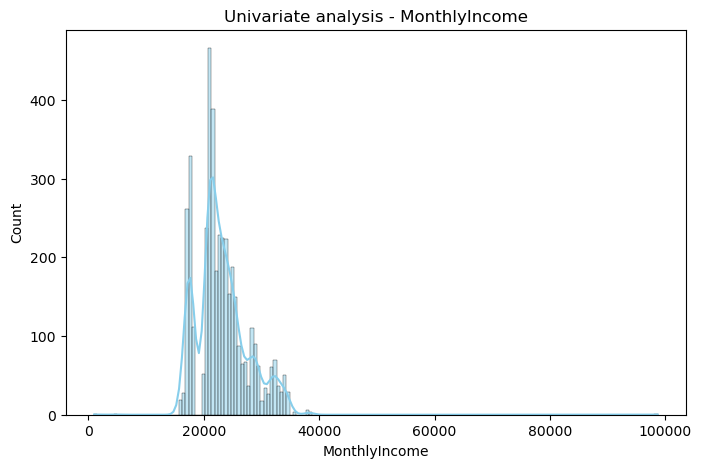

In [22]:
# Univariate analysis for numerical columns

for num_column in nums:
    plt.figure (figsize = (8,5))
    sns.histplot(df[num_column], kde= True, color = 'skyblue')
    plt.title(f"Univariate analysis - {num_column}")
    plt.show()

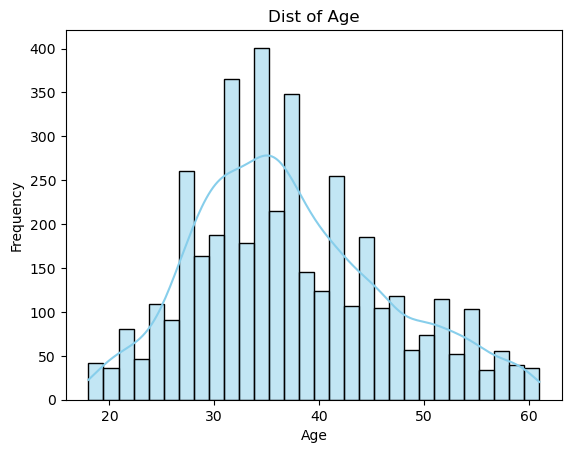

In [23]:
sns.histplot(df['Age'].dropna(), kde= True, bins= 30, color = 'skyblue', edgecolor = 'black')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [24]:
# insights>> 30-40 Age group are travelling more

<Axes: xlabel='TypeofContact', ylabel='count'>

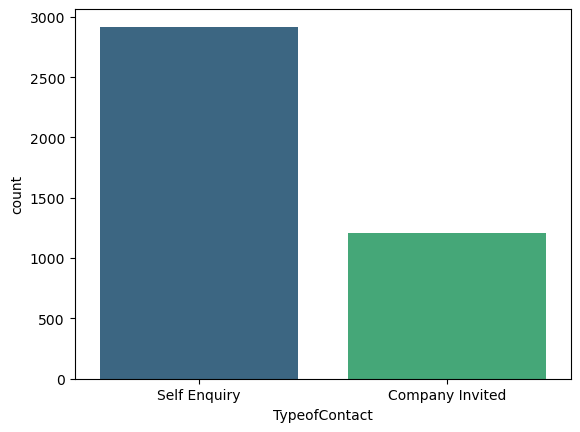

In [25]:
sns.countplot(x = 'TypeofContact', data= df , palette='viridis')

In [26]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0


In [27]:
# to make sure categorical colums is treated as categorical
# converted to object as we had made bifurcation of cats nums columns manually

df[cats] = df[cats].astype('O')

In [28]:
df[cats].describe().T

,count,unique,top,freq
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615
MaritalStatus,4128,4,Married,1990
Designation,4128,5,Executive,1615
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909


In [29]:
for cat in df[cats].columns:
    x = df[cat].unique()
    print(f"{cat}: {x} \n")

TypeofContact: ['Self Enquiry' 'Company Invited'] 

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business'] 

Gender: ['Female' 'Male'] 

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King'] 

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried'] 

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP'] 

ProdTaken: [1 0] 

CityTier: [3 1 2] 

PreferredPropertyStar: [3.0 4.0 5.0] 

Passport: [1 0] 

PitchSatisfactionScore: [2 3 5 4 1] 

OwnCar: [1 0] 



In [30]:
# Bi-variate analysis

df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

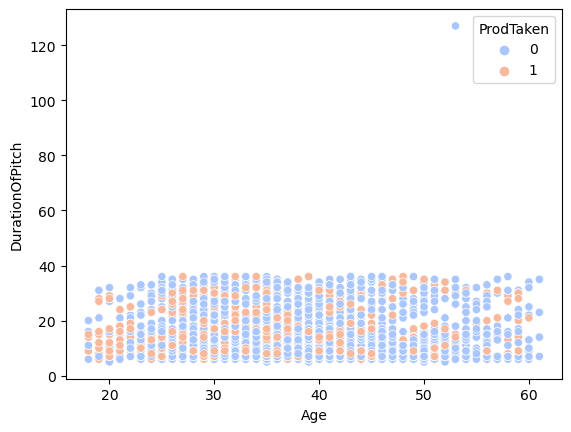

In [31]:
sns.scatterplot(x= 'Age', y= 'DurationOfPitch', data= df, hue = 'ProdTaken', palette='coolwarm')

In [32]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize= 'index')  # normalize gives percentage
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.866920,0.133080
Married,0.857789,0.142211
Single,0.635682,0.364318
Unmarried,0.756598,0.243402


<Axes: xlabel='MaritalStatus'>

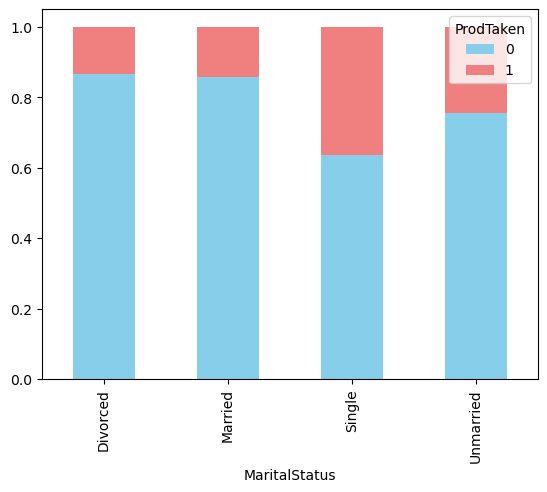

In [33]:
cross_tab.plot(kind = 'bar', stacked = True, color = ['skyblue', 'lightcoral'])

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

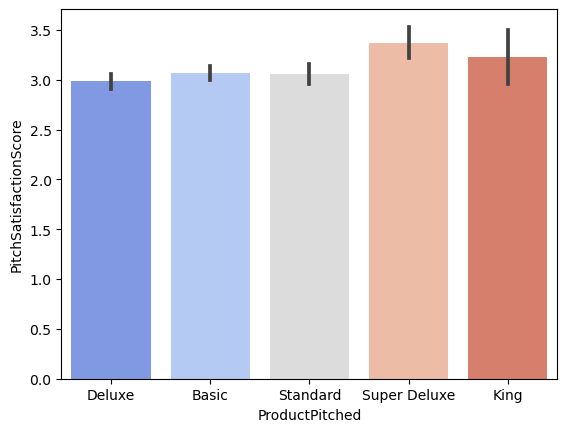

In [34]:
sns.barplot(x= 'ProductPitched', y= 'PitchSatisfactionScore', data = df, palette='coolwarm')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

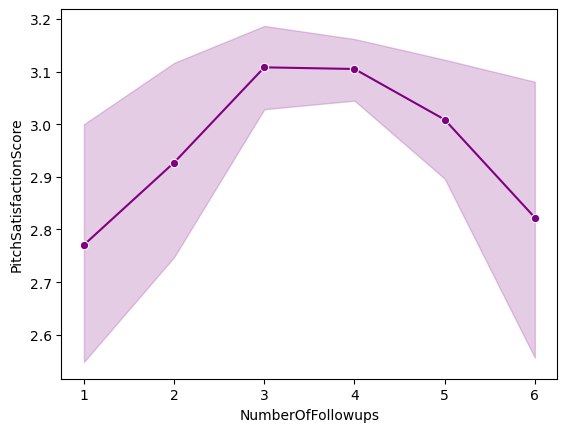

In [35]:
sns.lineplot(x= 'NumberOfFollowups', y= 'PitchSatisfactionScore', data = df, marker= 'o', color= 'purple' )

<Axes: xlabel='ProdTaken', ylabel='Age'>

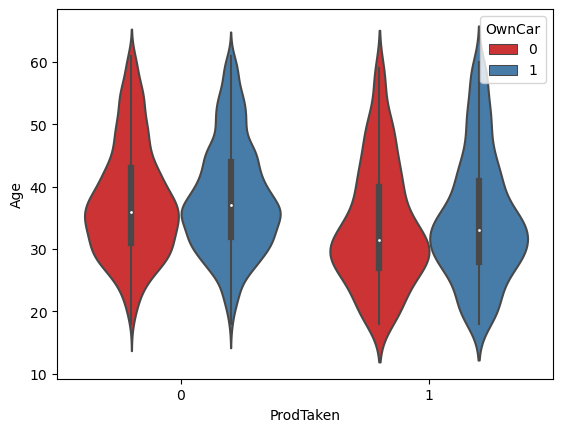

In [36]:
# multivariate analysis

sns.violinplot(x = 'ProdTaken', y= 'Age', data= df, hue= 'OwnCar', palette='Set1')

<Axes: xlabel='Gender', ylabel='Age'>

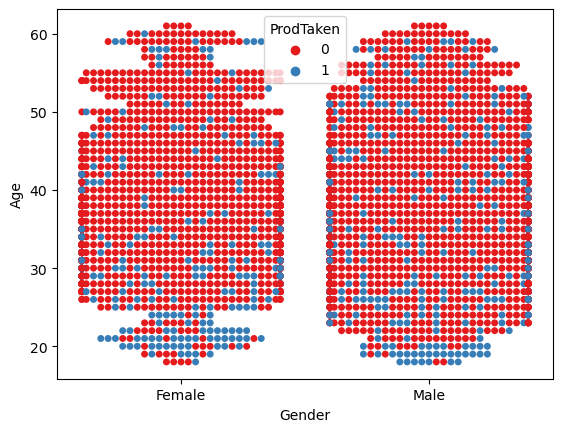

In [37]:
sns.swarmplot(x = 'Gender', y= 'Age', data= df, hue= 'ProdTaken', palette='Set1')

In [38]:
# 3D plots

from mpl_toolkits.mplot3d import axes3d

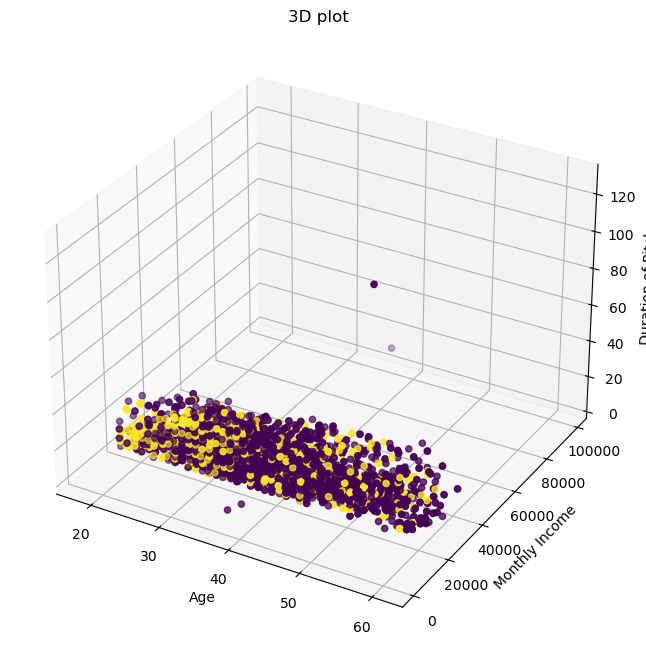

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(df['Age'], df['MonthlyIncome'], df['DurationOfPitch'], c= df['ProdTaken'], cmap= 'viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Duration of Pitch')
ax.set_title('3D plot')
plt.show()

<Axes: >

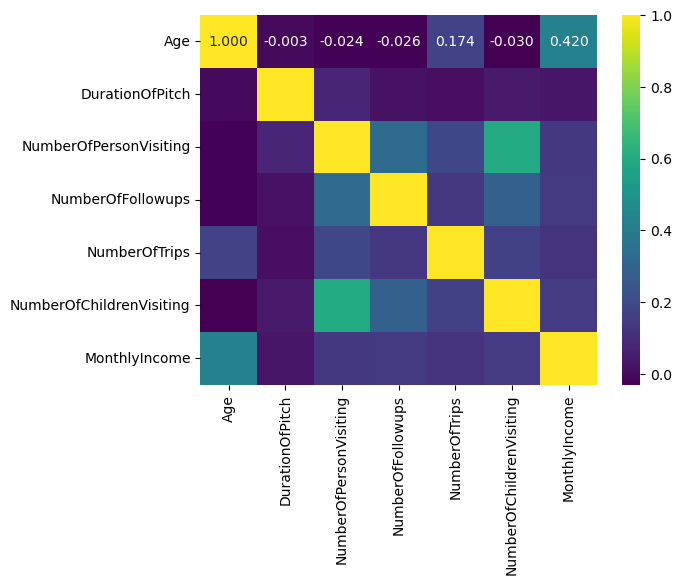

In [40]:
sns.heatmap(df[nums].corr(),cmap='viridis',  annot = True, fmt='.3f')

# Feature Engineering

In [41]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [42]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [43]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,4.0


In [44]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Feature are: ", len(num_features))

Number of Numerical Feature are:  8


In [45]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical Feature are: ", len(cat_features))

Number of Categorical Feature are:  12


In [46]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <=25]
print("Number of Discrete Features are: ", len(discrete_features))

Number of Discrete Features are:  5


In [47]:
# train test split

from sklearn.model_selection import train_test_split

In [48]:
X= df.drop('ProdTaken', axis=1)
y = df["ProdTaken"]

In [49]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
5,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,5.0


In [50]:
y

0       1
1       0
2       1
3       0
5       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4128, dtype: object

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
X_train.shape, X_test.shape

((3302, 19), (826, 19))

# Data Encoding

In [53]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [54]:
# Scaling >> numerical features >> StandardScaler
# categorical >> onehot encoding

In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [56]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first') # n features >> n-1 dummy features will be enough to explain everything

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [57]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object'))])

In [58]:
X_train = preprocessor.fit_transform(X_train)

In [59]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.731350,-0.059719,0.067447,0.242407,-0.712301,0.899419,-0.339286,0.580957
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.635063,-0.427614,1.459393,0.242407,1.452465,0.899419,-0.527440,1.290920
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.279493,1.411863,0.067447,-0.744556,0.911274,-1.437231,2.129980,-0.838969
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.196548,-0.182351,0.067447,1.229369,-0.712301,-0.268906,-0.102613,-0.129006
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.854320,-0.918141,0.067447,0.242407,-0.712301,-0.268906,-1.295202,-0.129006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,-0.351595,2.025022,0.067447,1.229369,-0.171110,0.899419,-0.038504,0.580957
3298,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,-0.022709,0.185545,1.459393,0.242407,0.911274,2.067745,0.570524,2.000882
3299,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.854320,-0.918141,-1.324498,0.242407,-0.712301,-0.268906,-0.527659,-0.838969
3300,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-0.241967,-0.672878,0.067447,1.229369,0.911274,-0.268906,-0.332919,-0.129006


In [60]:
X_test = preprocessor.transform(X_test)

In [61]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.854320,-0.059719,-1.324498,-0.744556,-1.253493,-1.437231,-1.278956,-1.548931
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.351595,-0.550246,0.067447,1.229369,2.534849,0.899419,-0.411298,0.580957
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.557511,-0.672878,-1.324498,-1.731519,-0.171110,-0.268906,-1.175548,-0.838969
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.525434,1.411863,1.459393,0.242407,-0.171110,2.067745,-0.297572,2.000882
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.744691,-0.550246,-1.324498,-0.744556,-1.253493,-0.268906,2.204188,-0.838969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.118996,-0.918141,-1.324498,-0.744556,-1.253493,-0.268906,-1.126808,-0.838969
822,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-0.132338,-0.550246,0.067447,1.229369,-0.171110,-0.268906,-0.465307,-0.129006
823,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.402464,-0.795510,1.459393,1.229369,0.370082,2.067745,0.196413,2.000882
824,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,-0.351595,1.411863,0.067447,-2.718482,-0.712301,-1.437231,-0.622724,-0.838969
